In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribuciones

## Histograma

In [4]:
tips = sns.load_dataset('tips')
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


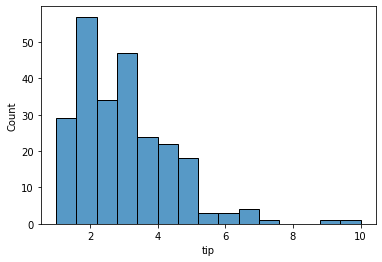

In [5]:
sns.histplot(data=tips, x='tip', bins=15)
plt.show()

### Cumulative

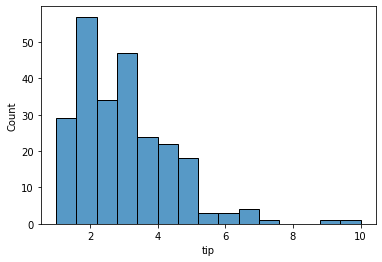

In [6]:
sns.histplot(data=tips, x='tip', bins=15, cumulative=False)
plt.show()

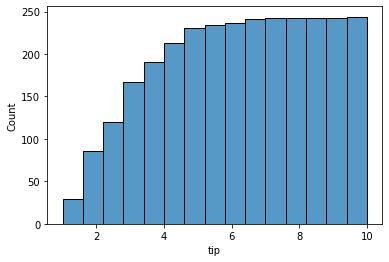

In [7]:
sns.histplot(data=tips, x='tip', bins=15, cumulative=True)
plt.show()

### Hue

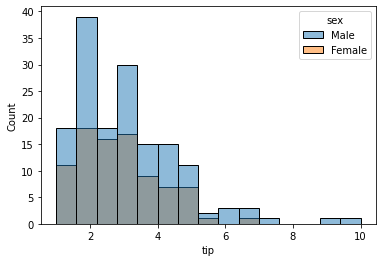

In [8]:
sns.histplot(data=tips, x='tip', bins=15, cumulative=False, hue='sex')
plt.show()

### Stat

#### count

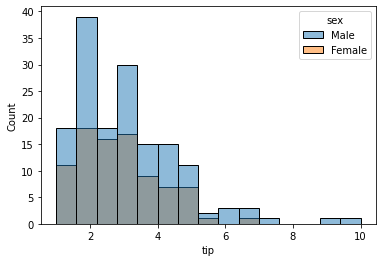

In [9]:
sns.histplot(data=tips, x='tip', bins=15, cumulative=False, hue='sex', stat='count')
plt.show()

#### probability

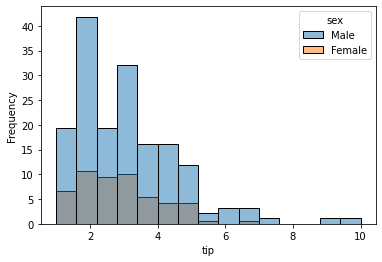

In [10]:
sns.histplot(data=tips, x='tip', bins=15, cumulative=False, hue='sex', stat='frequency')
plt.show()

#### percent

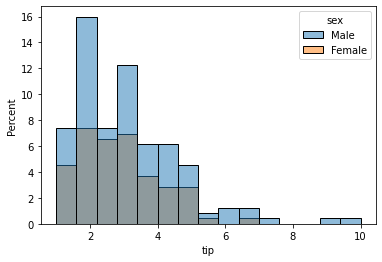

In [11]:
sns.histplot(data=tips, x='tip', bins=15, cumulative=False, hue='sex', stat='percent')
plt.show()

#### density

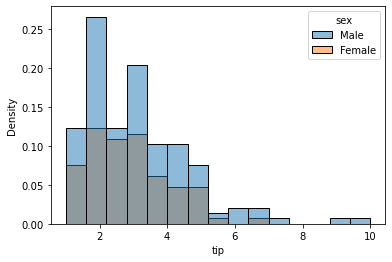

In [12]:
sns.histplot(data=tips, x='tip', bins=15, cumulative=False, hue='sex', stat='density')
plt.show()

### Multiple

#### Stack

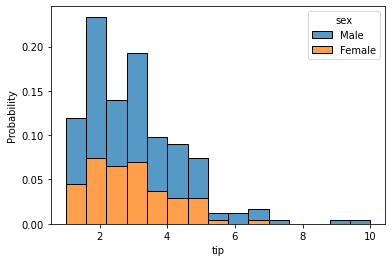

In [13]:
sns.histplot(data=tips, x='tip', bins=15, cumulative=False, hue='sex', stat='probability', multiple='stack')
plt.show()

#### Layer

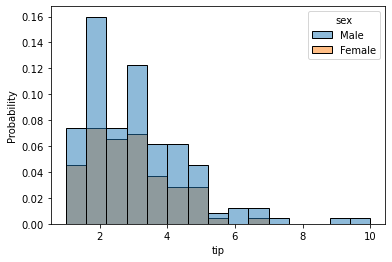

In [14]:
sns.histplot(data=tips, x='tip', bins=15, cumulative=False, hue='sex', stat='probability', multiple='layer')
plt.show()

#### Dodge

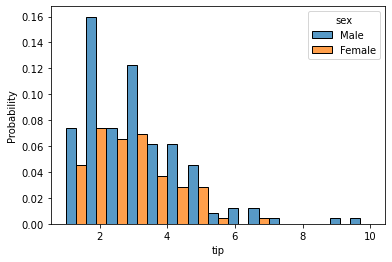

In [15]:
sns.histplot(data=tips, x='tip', bins=15, cumulative=False, hue='sex', stat='probability', multiple='dodge')
plt.show()

#### Fill

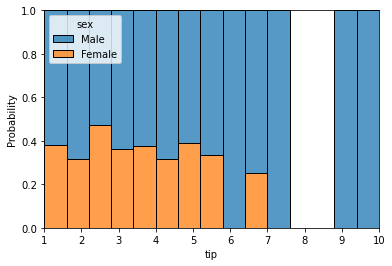

In [16]:
sns.histplot(data=tips, x='tip', bins=15, cumulative=False, hue='sex', stat='probability', multiple='fill')
plt.show()

## KDE
Diagrama de densidad

<AxesSubplot:xlabel='tip', ylabel='Density'>

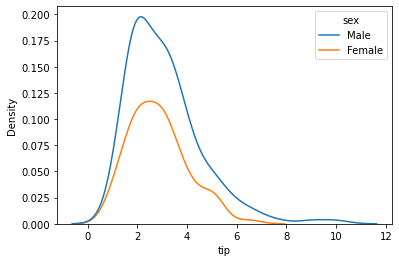

In [17]:
sns.kdeplot(data=tips, x='tip',hue='sex')

### cumulative

<AxesSubplot:xlabel='tip', ylabel='Density'>

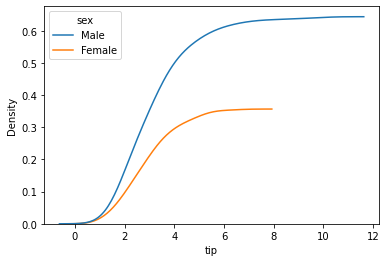

In [18]:
sns.kdeplot(data=tips, x='tip',hue='sex',cumulative=True)

### shade

<AxesSubplot:xlabel='tip', ylabel='Density'>

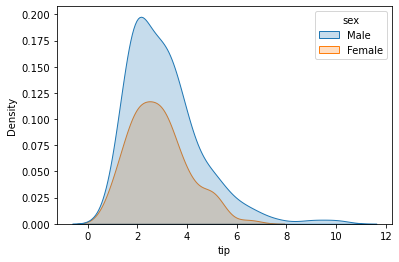

In [19]:
sns.kdeplot(data=tips, x='tip',hue='sex',cumulative=False, shade=True)

### bw_adjust

<AxesSubplot:xlabel='tip', ylabel='Density'>

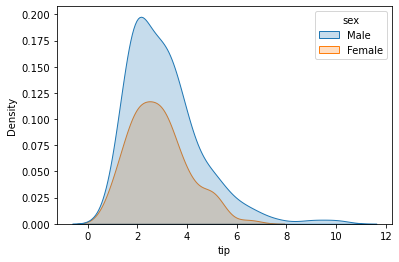

In [20]:
sns.kdeplot(data=tips, x='tip',hue='sex',cumulative=False, shade=True, bw_adjust=1)

## ecdf
Grafico escalonado de la prorcion en relacion a su frecuencia

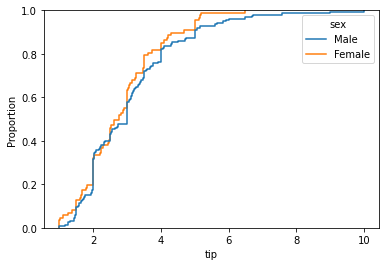

In [21]:
sns.ecdfplot(data=tips, x='tip',hue='sex')
plt.show()

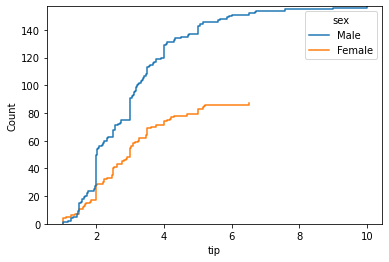

In [22]:
sns.ecdfplot(data=tips, x='tip',hue='sex', stat='count')
plt.show()

## dist

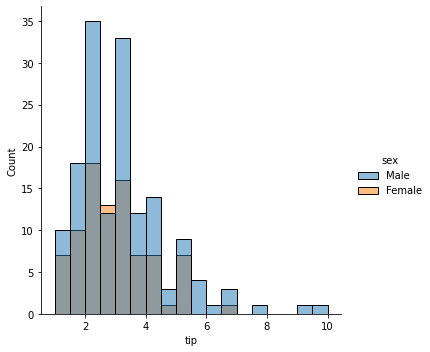

In [23]:
sns.displot(data=tips, x='tip', hue='sex')
plt.show()

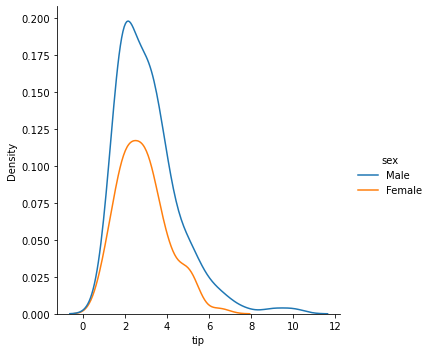

In [24]:
sns.displot(data=tips, x='tip', hue='sex', kind='kde')
plt.show()

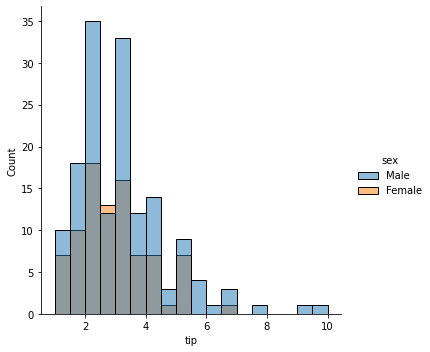

In [25]:
sns.displot(data=tips, x='tip', hue='sex', kind='hist')
plt.show()

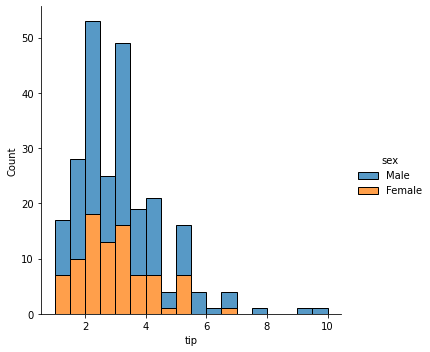

In [26]:
sns.displot(data=tips, x='tip', hue='sex', kind='hist', multiple='stack')
plt.show()

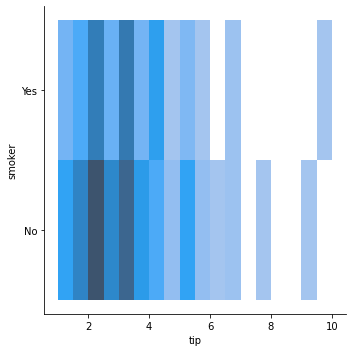

In [27]:
sns.displot(data=tips, x='tip', y='smoker')
plt.show()

In [28]:
tips['weekend'] = tips.apply(lambda x: True if (x['day']=='Sun' or x['day']=='Sat') else False, axis=1)

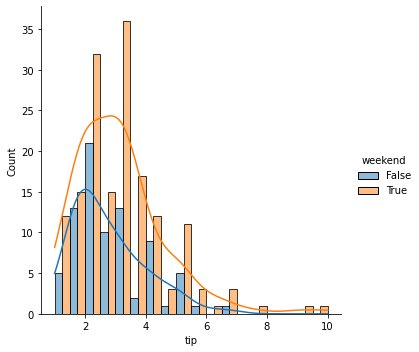

In [29]:
sns.displot(data=tips, x='tip', hue='weekend', kde='True', multiple='dodge')
plt.show()

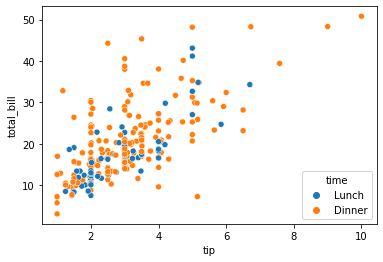

In [30]:
sns.scatterplot(data=tips, x='tip',y='total_bill', hue='time')
plt.show()

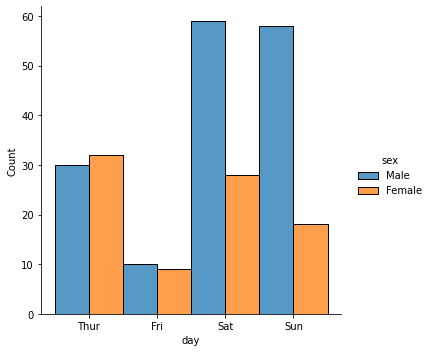

In [31]:
sns.displot(data=tips,x='day', hue='sex',multiple='dodge')

## Investigacion

In [32]:
import numpy as np
import pandas as pd

In [33]:
datas = np.copy(tips[['sex','tip']])
datas = pd.DataFrame(datas)
datas = datas.rename(columns={datas.columns[0]:'sex'})
datas = datas.rename(columns={datas.columns[1]:'tip'})
datas.head(3)

,sex,tip
0,Female,1.01
1,Male,1.66
2,Male,3.5


In [34]:
indexMale = datas['sex'] == 'Male'

In [35]:
meanMale = np.mean(datas[indexMale])
maxMale = np.max(datas[indexMale])
minMale = np.min(datas[indexMale])


/home/mazzaroli/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3417: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [36]:
meanFemale = np.mean(datas[~indexMale])
maxFemale = np.max(datas[~indexMale])
minFemale = np.min(datas[~indexMale])

In [42]:
arrMale = [
    meanMale['tip'],
    maxMale['tip'],
    minMale['tip']
]
arrMale = np.array(arrMale)

arrFemale = [
    meanFemale['tip'],
    maxFemale['tip'],
    minFemale['tip'],
]
arrFemale = np.array(arrFemale)

In [45]:
index = ['mean','max','min']
df_male = pd.DataFrame(arrMale, index=index)
df_male = df_male.rename(columns={df_male.columns[0]:'male'})

df_female = pd.DataFrame(arrFemale, index=index)
df_female = df_female.rename(columns={df_female.columns[0]:'female'})



In [46]:
df_male

,male
mean,3.089618
max,10.000000
min,1.000000


In [48]:
df_female

,female
mean,2.833448
max,6.500000
min,1.000000
